In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
county_np = np.loadtxt('county_matrix.csv', delimiter=',', dtype=int)
map_fips = np.unique(county_np)

In [3]:
dict_dict = {}

census_df = pd.read_csv('census.csv').set_index('FIPS')
census_pct = census_df.rank(pct=True)
display(census_df.head())
display(census_pct.head())

dict_dict['pop_density'] = census_pct['pop_density'].to_dict()

,POPESTIMATE2019,sq_miles,pop_density
FIPS,,,
1001,55869,633,88.260664
1003,223234,1742,128.148106
1005,24686,932,26.487124
1007,22394,643,34.827372
1009,57826,682,84.788856


,POPESTIMATE2019,sq_miles,pop_density
FIPS,,,
1001,0.706885,0.482465,0.701737
1003,0.902188,0.891248,0.770592
1005,0.482947,0.725064,0.361969
1007,0.454311,0.493565,0.438546
1009,0.714607,0.533784,0.689833


In [4]:
scale=0.9

def calc_matrix(dict_type, lum=1):
    scale=0.9

    img_np = np.zeros([county_np.shape[0], county_np.shape[1]])

    for row in np.arange(0, county_np.shape[0]):
        for col in np.arange(0, county_np.shape[1]):
            if county_np[row, col] != 0:
                try:
                    img_np[row, col] = dict_dict[dict_type][county_np[row, col]]*scale*lum+1-scale
                except KeyError:
                    img_np[row, col] = 0.05    
    return img_np


In [5]:
def plot_img(image, series, color, title, cbar_title, export_name, \
             round_num=4, clip=None, cbar_index=None, lum=1, bkgd=None):
    plt.rcParams["figure.figsize"] = (16,8)

    try:
        colors = cm.get_cmap(color, 100)
    except:
        colors = color
    base_colors = colors(np.linspace(0, 1, int(100/lum)))[:100]
    if clip == 1:
        base_colors[:9, :] = np.array([0.5, 0.5, 0.5, 1])
        base_colors[9:11, :] = np.array([0, 0, 0, 1])
        base_colors[11:, :] = colors(np.linspace(0, 1, 89))
    elif clip == 0:
        base_colors[:10, :] = np.array([0.5, 0.5, 0.5, 1])
        base_colors[10:, :] = colors(np.linspace(0, 1, 90))
    base_cm = ListedColormap(base_colors)

    new_colors = base_colors.copy()
    if bkgd is None:
        new_colors[:5, :] = np.array([0.1, 0.1, 0.1, 1])
    else:
        new_colors[:5, :] = bkgd
    new_colors[5:10, :] = np.array([0.5, 0.5, 0.5, 1])
    new_colors[10:, :] = colors(np.linspace(0, 1, 90))
    if clip:
        new_colors[10, :] = np.array([0, 0, 0, 1])
    custom_cm = ListedColormap(new_colors)

    county_img = custom_cm(image)

    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('miles')
    ax.set_ylabel('miles')
    im = ax.imshow(county_img, cmap=base_cm)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbar_title, labelpad=10, fontsize=14)
    if clip is None:
        cbar.set_ticks(list(np.linspace(0.05,1,11)))
        cbar.set_ticklabels(list(np.linspace(min(series), max(series), 11).round(round_num)))
    else:
        cbar.set_ticks([0.05] + list(np.linspace(1-scale,1,10)))
        cbar.set_ticklabels(['no data'] + list(np.linspace(min(series), max(series), 10).round(round_num)))
        if round_num==0:
            cbar.set_ticklabels(['no data'] + list(np.linspace(min(series), max(series), 10).astype(int)))
    if cbar_index is not None:
        cbar.set_ticklabels(cbar_index)
    plt.show()
    fig.tight_layout()
    fig.savefig(export_name, dpi=200)


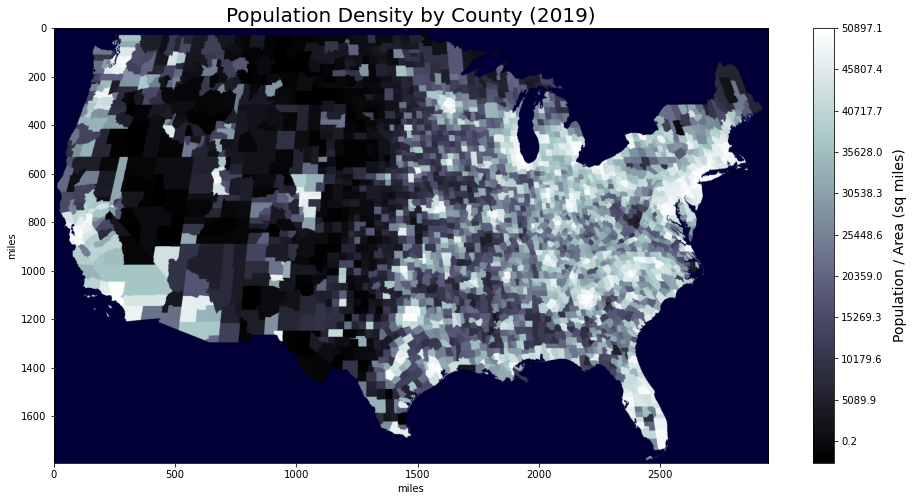

In [6]:
pop_density_img = calc_matrix('pop_density')
plot_img(pop_density_img, census_df['pop_density'], 'bone', \
         'Population Density by County (2019)', 'Population / Area (sq miles)', 'data_pop_density.png', \
         round_num=1, bkgd=np.array([0, 0, 55/255, 1]))

In [7]:
corona_df = pd.read_csv('corona.csv').set_index('FIPS')
corona_df = corona_df[corona_df.index.isin(map_fips)]
corona_df['pct_cases'] = corona_df.cases_now/corona_df.POPULATION
display(corona_df.head())
corona_pct = corona_df.rank(pct=True)
display(corona_pct.head())

dict_dict['cases_now'] = corona_pct['cases_now'].dropna().to_dict()
dict_dict['pct_cases'] = corona_pct['pct_cases'].dropna().to_dict()

,cases_now,cases_old,POPULATION,pct_cases
FIPS,,,,
1001,68.0,37.0,55869,0.001217
1003,216.0,161.0,223234,0.000968
1005,58.0,33.0,24686,0.002350
1007,45.0,38.0,22394,0.002009
1009,44.0,34.0,57826,0.000761


,cases_now,cases_old,POPULATION,pct_cases
FIPS,,,,
1001,0.657257,0.627468,0.685833,0.601663
1003,0.821095,0.835296,0.896086,0.533079
1005,0.626602,0.606339,0.445791,0.773814
1007,0.584863,0.632490,0.414964,0.733980
1009,0.581573,0.612227,0.694146,0.448216


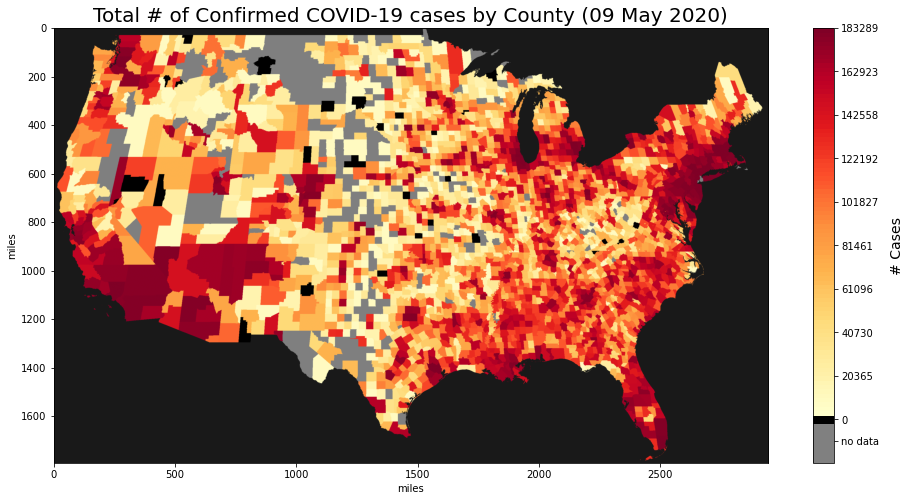

In [8]:
total_cases_img = calc_matrix('cases_now')
plot_img(total_cases_img, corona_df['cases_now'], 'YlOrRd', \
         'Total # of Confirmed COVID-19 cases by County (09 May 2020)', '# Cases', 'data_cases_total.png', \
         round_num=0, clip=1)

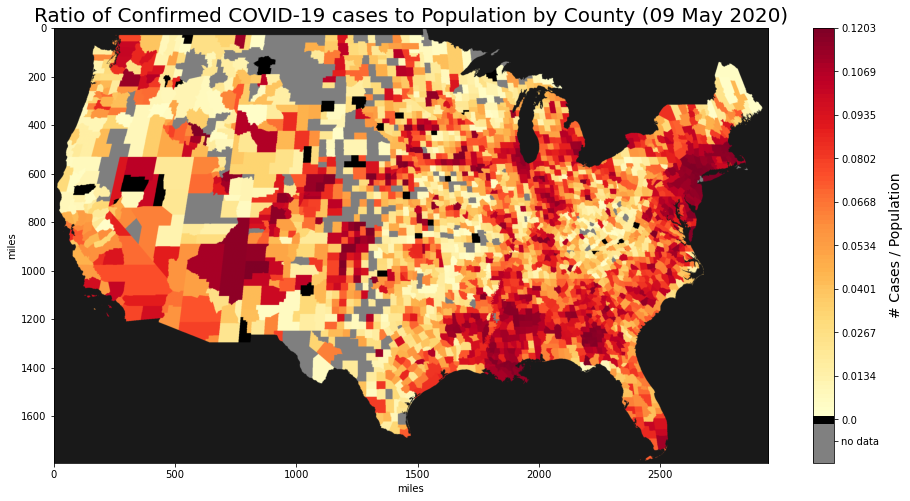

In [9]:
pct_cases_img = calc_matrix('pct_cases')
plot_img(pct_cases_img, corona_df['pct_cases'], 'YlOrRd', \
         'Ratio of Confirmed COVID-19 cases to Population by County (09 May 2020)', '# Cases / Population', 'data_cases_pct.png', \
         clip=1)

In [10]:
param_df = pd.read_csv('params.csv').set_index('FIPS')
display(param_df)
param_df_pct = param_df.rank(pct=True)
display(param_df_pct)
dict_dict['SUSCEPTIBLE'] = param_df_pct['SUSCEPTIBLE'].to_dict()
dict_dict['INFECTED'] = param_df_pct['INFECTED'].to_dict()
dict_dict['RECOVERED'] = param_df_pct['RECOVERED'].to_dict()
dict_dict['beta'] = param_df_pct.beta.to_dict()
dict_dict['gamma'] = param_df_pct.gamma.to_dict()

,beta,gamma,SUSCEPTIBLE,INFECTED,RECOVERED,US
FIPS,,,,,,
1001,0.000041,0.000023,0.998783,0.000555,0.000662,1
1003,0.000022,0.000026,0.999032,0.000246,0.000721,1
1005,0.000075,0.000069,0.997650,0.001013,0.001337,1
1007,0.000035,0.000062,0.997991,0.000313,0.001697,1
1009,0.000016,0.000024,0.999239,0.000173,0.000588,1
...,...,...,...,...,...,...
56037,0.000005,0.000016,0.999551,0.000071,0.000378,1
56039,0.000009,0.000128,0.995823,0.000128,0.004049,1
56041,0.000036,0.000033,0.999555,0.000099,0.000346,1


,beta,gamma,SUSCEPTIBLE,INFECTED,RECOVERED,US
FIPS,,,,,,
1001,0.635779,0.390283,0.444337,0.715573,0.573681,0.500161
1003,0.374517,0.445624,0.509331,0.523810,0.602960,0.500161
1005,0.828507,0.841055,0.208816,0.829151,0.766731,0.500161
1007,0.558880,0.822716,0.289254,0.578829,0.818211,0.500161
1009,0.170206,0.403475,0.589125,0.446911,0.525418,0.500161
...,...,...,...,...,...,...
56037,0.030245,0.214286,0.748713,0.243887,0.360682,0.500161
56039,0.079151,0.922780,0.108430,0.370335,0.943372,0.500161
56041,0.572394,0.558880,0.750965,0.311776,0.317568,0.500161


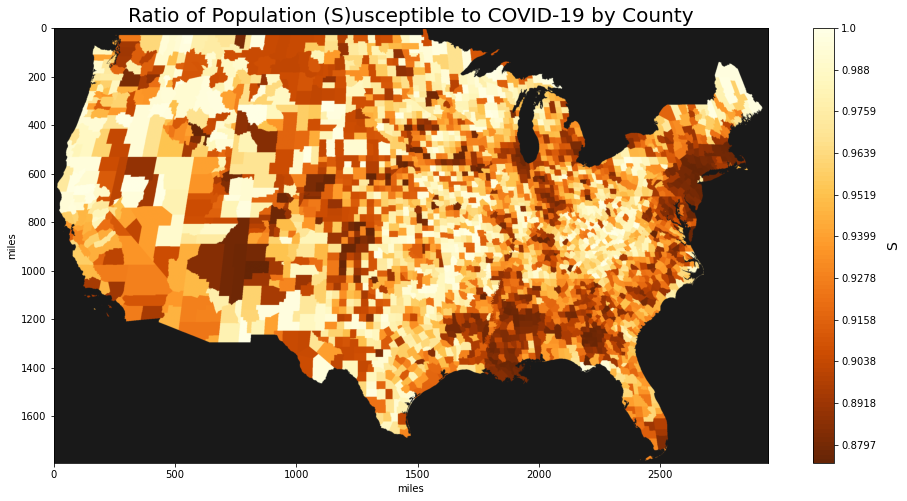

In [11]:
s_img = calc_matrix('SUSCEPTIBLE')
plot_img(s_img, param_df['SUSCEPTIBLE'], 'YlOrBr_r', \
         'Ratio of Population (S)usceptible to COVID-19 by County', 'S', 'data_S.png')

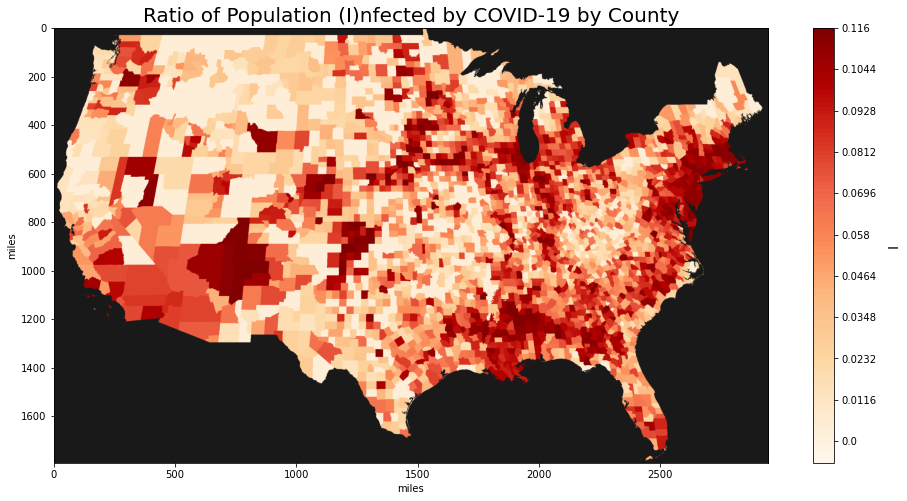

In [12]:
i_img = calc_matrix('INFECTED')
plot_img(i_img, param_df['INFECTED'], 'OrRd', \
         'Ratio of Population (I)nfected by COVID-19 by County', 'I', 'data_I.png')

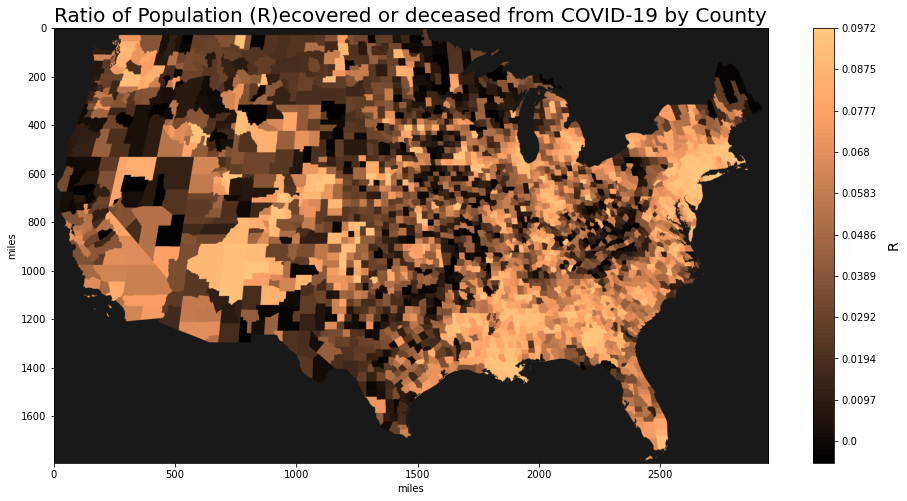

In [13]:
r_img = calc_matrix('RECOVERED')
plot_img(r_img, param_df['RECOVERED'], 'copper', \
         'Ratio of Population (R)ecovered or deceased from COVID-19 by County', 'R', 'data_R.png')

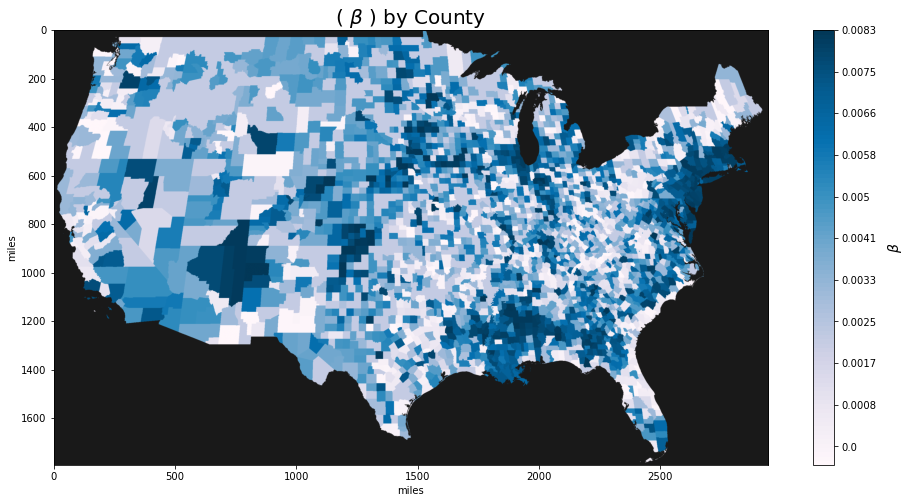

In [14]:
beta_img = calc_matrix('beta')
plot_img(beta_img, param_df['beta'], 'PuBu', \
         r'( $\beta$ ) by County', r'$\beta$', 'data_beta.png')

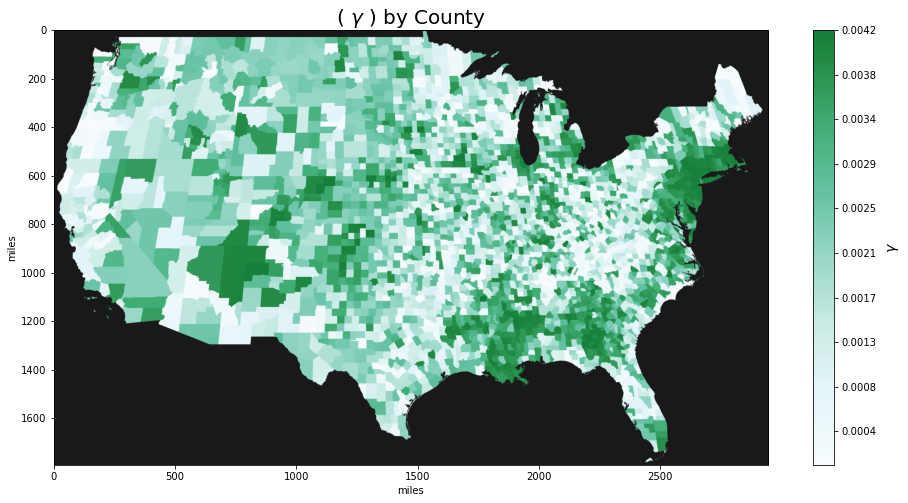

In [15]:
gamma_img = calc_matrix('gamma', lum=0.8)
plot_img(gamma_img, param_df['gamma'], 'BuGn', \
         r'( $\gamma$ ) by County', r'$\gamma$', 'data_gamma.png', lum=0.8)

In [16]:
beta_gamma_ratio = param_df.beta/param_df.gamma
beta_gamma_ratio_pct = beta_gamma_ratio[beta_gamma_ratio<1].rank(pct=True)/2
beta_gamma_ratio_pct = beta_gamma_ratio_pct.append(beta_gamma_ratio[beta_gamma_ratio>=1].rank(pct=True)/2+0.5)
dict_dict['beta_gamma_ratio'] = beta_gamma_ratio_pct.to_dict()

gamma_beta = beta_gamma_ratio[beta_gamma_ratio<=1]
beta_gamma = beta_gamma_ratio[beta_gamma_ratio>=1]
beta_gamma_cbar_index = [(max(gamma_beta)-min(gamma_beta))/5*i + min(gamma_beta) for i in range(6)][:5]
beta_gamma_cbar_index += [(max(beta_gamma)-min(beta_gamma))/5*i + min(beta_gamma) for i in range(6)]
beta_gamma_cbar_index = [round(i, 4) for i in beta_gamma_cbar_index]
beta_gamma_cbar_index

[0.0287,
 0.2228,
 0.417,
 0.6112,
 0.8053,
 1.0003,
 15.806,
 30.6116,
 45.4173,
 60.2229,
 75.0286]

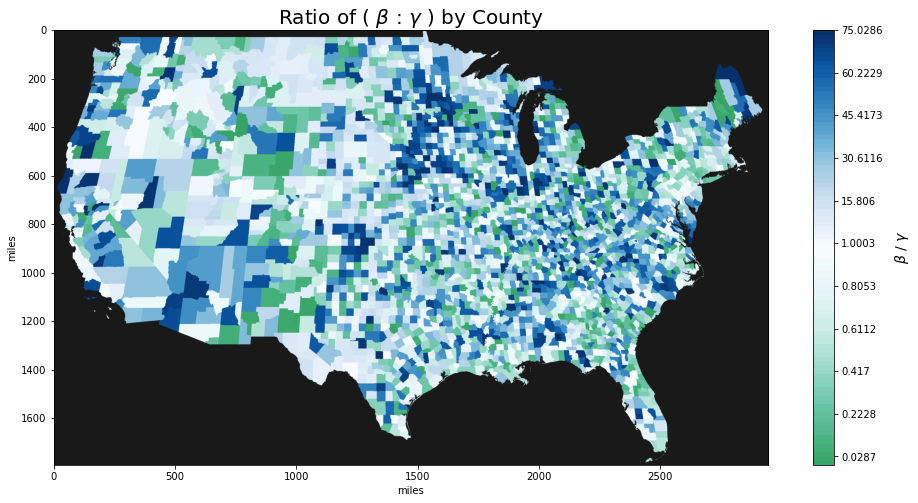

In [17]:
color1 = cm.get_cmap('BuGn_r', 128)
color2 = cm.get_cmap('Blues', 128)
newcolors = np.vstack((color1(np.linspace(0, 1, 96)[-64:]),
                       color2(np.linspace(0, 1, 64))))
newcmp = ListedColormap(newcolors, name='beta_gamma')

beta_gamma_img = calc_matrix('beta_gamma_ratio')
plot_img(beta_gamma_img, beta_gamma_ratio_pct, newcmp, \
         r'Ratio of ( $\beta$ : $\gamma$ ) by County', r'$\beta$ / $\gamma$', 'data_beta_gamma.png', \
         cbar_index=beta_gamma_cbar_index)